# <p style="text-align:center;"><span style="color:blue">MAIN PROJECT: ROOM OCCUPANCY ESTIMATION</span></p>


#### <a href="https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation" title="Dataset Link">-->Room Occupancy Estimation Dataset </a>


## Features

##### 1. Date : Indicating when (date) the data was captured.
##### 2. Time: The timestamp or time interval for each reading, indicating when the data was captured.
##### 3. S1_Temp: The temperature of the room in degrees Celsius (°C). It is measured by a temperature sensor1.
##### 4. S2_Temp: The temperature of the room in degrees Celsius (°C). It is measured by a temperature sensor2.
##### 5. S3_Temp: The temperature of the room in degrees Celsius (°C). It is measured by a temperature sensor3.
##### 6. S4_Temp: The temperature of the room in degrees Celsius (°C). It is measured by a temperature sensor4.
##### 7. S1_Light: The light level in the room measured in Lux (a unit of illuminance).It is measured by a light sensor1.
##### 8. S2_Light: The light level in the room measured in Lux (a unit of illuminance).It is measured by a light sensor2.
##### 9. S3_Light: The light level in the room measured in Lux (a unit of illuminance).It is measured by a light sensor3.
##### 10. S4_Light: The light level in the room measured in Lux (a unit of illuminance).It is measured by a light sensor4.
##### 11. S1_Sound: This feature would represent the noise level or sound intensity detected in the room. It is measured by a sound sensor1.
##### 12. S2_Sound: This feature would represent the noise level or sound intensity detected in the room. It is measured by a sound sensor2.
##### 13. S3_Sound: This feature would represent the noise level or sound intensity detected in the room. It is measured by a sound sensor3.
##### 14. S4_Sound: This feature would represent the noise level or sound intensity detected in the room. It is measured by a sound sensor4.
##### 15. S5_CO2: The concentration of carbon dioxide (CO2) in the room, measured in parts per million (PPM).
##### 16. S5_CO2_Slope: This feature indicate how fast the CO2 concentration is increasing or decreasing in the room over time.
##### 17. S6_PIR: A binary value (0 or 1) from a Passive Infrared (PIR) sensor1, which detects motion in the room.
##### 18. S7_PIR: A binary value (0 or 1) from a Passive Infrared (PIR) sensor2, which detects motion in the room.
##### 19. Room_Occupancy_Count:  The target variable representing the number of people in the room (0 to 3 people).




### <span style="color:blue"> Data Prepocessing </span>


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:

df = pd.read_csv("Occupancy_Estimation.csv")
df.sample(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
5068,2017/12/24,07:08:48,25.06,25.13,24.50,25.38,0,0,5,3,0.07,0.05,0.07,0.06,360,0.015385,0,0,0
3866,2017/12/23,20:45:53,25.88,25.81,25.50,26.13,0,0,0,0,0.07,0.04,0.06,0.06,805,-1.703846,0,0,0
4747,2017/12/24,04:22:21,25.25,25.25,24.69,25.63,0,0,0,0,0.07,0.05,0.06,0.06,360,0.000000,0,0,0
7110,2017/12/26,00:47:05,25.38,25.38,24.94,25.81,0,0,0,0,0.08,0.04,0.07,0.10,355,0.000000,0,0,0
4289,2017/12/24,00:25:26,25.44,25.44,24.94,25.69,0,0,0,0,0.06,0.05,0.05,0.06,370,0.000000,0,0,0


In [5]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [7]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [8]:
df.shape

(10129, 19)

In [9]:
df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [12]:
# outlier handling using percentile
min_threshold = df.S1_Temp.quantile(0.001)
max_threshold = df.S1_Temp.quantile(0.999)

min_threshold, max_threshold

(np.float64(25.0), np.float64(26.38))

In [13]:
df[df.S1_Temp < min_threshold]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1


In [14]:
df[df.S1_Temp > max_threshold]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count


In [15]:
df2 = df[(df.S1_Temp<max_threshold) & (df.S1_Temp>min_threshold)]
df2.shape

(9983, 19)

In [16]:
df2.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,25.458038,25.548012,25.061131,25.757962,25.370730,25.853751,34.004407,13.115697,0.167123,0.119941,0.157607,0.103614,460.687669,-0.006491,0.089853,0.079535,0.397676
std,0.347808,0.577540,0.423944,0.354617,51.002344,67.170046,58.487988,19.697210,0.312991,0.266717,0.412581,0.119904,198.274136,1.172000,0.285985,0.270586,0.891714
min,25.060000,24.810000,24.440000,24.940000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.500000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,25.000000,25.750000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.000000,50.000000,21.000000,0.080000,0.060000,0.070000,0.100000,470.000000,0.000000,0.000000,0.000000,0.000000
max,26.310000,29.000000,26.190000,26.500000,165.000000,258.000000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [17]:
# outlier handling using Z score
df2['zscore'] = ( df2.S2_Temp - df2.S2_Temp.mean() ) / df2.S2_Temp.std()
df2.head(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
10,2017/12/22,10:54:47,25.06,24.81,24.56,25.44,122,35,57,43,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1,-1.277854
11,2017/12/22,10:55:18,25.06,24.81,24.56,25.50,123,35,57,44,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1,-1.277854
12,2017/12/22,10:55:49,25.06,24.88,24.63,25.50,123,35,57,43,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1,-1.156651
13,2017/12/22,10:56:19,25.06,24.81,24.63,25.56,123,35,57,44,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1,-1.277854
14,2017/12/22,10:56:50,25.06,24.88,24.63,25.56,123,35,58,44,0.57,0.17,0.21,0.13,390,-0.630769,1,0,1,-1.156651


In [18]:
df2[df2['zscore']>3]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
136,2017/12/22,12:01:41,25.56,27.44,25.06,26.00,156,244,75,58,0.10,0.05,0.06,0.06,600,2.146154,0,0,2,3.275945
137,2017/12/22,12:02:11,25.56,27.50,25.06,26.00,157,244,75,58,0.09,0.05,0.05,0.06,600,2.230769,0,0,2,3.379834
138,2017/12/22,12:02:42,25.56,27.56,25.06,26.00,157,244,75,58,0.09,0.07,0.08,0.07,595,2.226923,0,0,2,3.483723
139,2017/12/22,12:03:12,25.56,27.75,25.06,26.00,156,244,75,58,0.70,0.10,0.08,0.09,605,2.326923,1,0,2,3.812705
140,2017/12/22,12:03:43,25.56,27.94,25.06,25.94,157,244,75,59,1.93,0.15,0.11,0.06,595,2.292308,1,0,2,4.141687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,2017/12/22,19:28:26,26.31,28.06,26.13,26.44,142,227,172,10,1.04,0.34,3.43,0.13,1250,1.357692,0,0,3,4.349465
948,2017/12/22,19:28:57,26.31,28.00,26.13,26.44,142,227,173,10,0.09,0.08,0.06,0.06,1260,1.673077,0,0,3,4.245576
950,2017/12/22,19:29:58,26.31,27.94,26.13,26.44,142,227,173,10,1.01,1.00,2.15,0.72,1265,2.157692,1,1,3,4.141687
951,2017/12/22,19:30:29,26.31,28.13,26.13,26.44,142,227,172,10,1.72,0.62,2.98,0.58,1270,2.315385,1,1,3,4.470669


In [19]:
df2[df2['zscore']<-3]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore


In [20]:
df2[(df2.zscore<-3) | (df2.zscore>3)]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
136,2017/12/22,12:01:41,25.56,27.44,25.06,26.00,156,244,75,58,0.10,0.05,0.06,0.06,600,2.146154,0,0,2,3.275945
137,2017/12/22,12:02:11,25.56,27.50,25.06,26.00,157,244,75,58,0.09,0.05,0.05,0.06,600,2.230769,0,0,2,3.379834
138,2017/12/22,12:02:42,25.56,27.56,25.06,26.00,157,244,75,58,0.09,0.07,0.08,0.07,595,2.226923,0,0,2,3.483723
139,2017/12/22,12:03:12,25.56,27.75,25.06,26.00,156,244,75,58,0.70,0.10,0.08,0.09,605,2.326923,1,0,2,3.812705
140,2017/12/22,12:03:43,25.56,27.94,25.06,25.94,157,244,75,59,1.93,0.15,0.11,0.06,595,2.292308,1,0,2,4.141687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,2017/12/22,19:28:26,26.31,28.06,26.13,26.44,142,227,172,10,1.04,0.34,3.43,0.13,1250,1.357692,0,0,3,4.349465
948,2017/12/22,19:28:57,26.31,28.00,26.13,26.44,142,227,173,10,0.09,0.08,0.06,0.06,1260,1.673077,0,0,3,4.245576
950,2017/12/22,19:29:58,26.31,27.94,26.13,26.44,142,227,173,10,1.01,1.00,2.15,0.72,1265,2.157692,1,1,3,4.141687
951,2017/12/22,19:30:29,26.31,28.13,26.13,26.44,142,227,172,10,1.72,0.62,2.98,0.58,1270,2.315385,1,1,3,4.470669


In [21]:
df3 = df2[(df2.zscore>-3) & (df2.zscore<3)]
df3.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
10,2017/12/22,10:54:47,25.06,24.81,24.56,25.44,122,35,57,43,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1,-1.277854
11,2017/12/22,10:55:18,25.06,24.81,24.56,25.50,123,35,57,44,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1,-1.277854
12,2017/12/22,10:55:49,25.06,24.88,24.63,25.50,123,35,57,43,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1,-1.156651
13,2017/12/22,10:56:19,25.06,24.81,24.63,25.56,123,35,57,44,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1,-1.277854
14,2017/12/22,10:56:50,25.06,24.88,24.63,25.56,123,35,58,44,0.57,0.17,0.21,0.13,390,-0.630769,1,0,1,-1.156651


In [22]:
df3.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
count,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,25.445927,25.493963,25.047577,25.747470,22.404057,20.921627,30.600656,12.315029,0.152712,0.110370,0.137034,0.098124,450.885667,-0.047317,0.076222,0.067821,0.346174,-0.093585
std,0.339965,0.453578,0.414723,0.350654,47.551394,59.272747,53.529802,18.774111,0.284640,0.246528,0.353416,0.091980,186.036754,1.114131,0.265366,0.251451,0.829976,0.785363
min,25.060000,24.810000,24.440000,24.940000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,-1.277854
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.053846,0.000000,0.000000,0.000000,-0.619891
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,-0.290909
75%,25.560000,25.630000,25.310000,26.000000,10.000000,12.000000,46.000000,21.000000,0.080000,0.060000,0.070000,0.100000,440.000000,0.000000,0.000000,0.000000,0.000000,0.141961
max,26.310000,27.250000,26.130000,26.500000,165.000000,257.000000,280.000000,74.000000,3.880000,3.440000,3.670000,1.800000,1255.000000,5.138462,1.000000,1.000000,3.000000,2.946964


In [23]:
# outlier handling using 3 standard deviation
upper_limit = df3.S5_CO2.mean() + 3*df3.S5_CO2.std()
upper_limit

np.float64(1008.9959308876005)

In [24]:
lower_limit = df3.S5_CO2.mean() -3*df3.S5_CO2.std()
lower_limit

np.float64(-107.22459598338986)

In [25]:
df3[(df3.S5_CO2>upper_limit) | (df3.S5_CO2<lower_limit)]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
801,2017/12/22,18:12:52,26.31,26.38,26.00,26.31,148,234,178,10,0.14,0.12,0.16,0.07,1010,2.846154,1,1,3,1.440574
802,2017/12/22,18:13:23,26.25,26.38,26.00,26.38,148,234,179,10,0.86,0.30,0.24,0.11,1015,2.757692,1,1,3,1.440574
803,2017/12/22,18:13:53,26.25,26.31,26.00,26.38,149,235,178,10,0.90,0.83,2.85,0.93,1015,2.653846,1,1,3,1.319370
804,2017/12/22,18:14:24,26.25,26.31,26.00,26.31,149,234,178,10,0.50,0.35,2.04,0.47,1015,2.538462,1,1,3,1.319370
805,2017/12/22,18:14:55,26.31,26.31,26.00,26.44,149,234,178,10,1.03,1.46,3.66,1.08,1015,2.465385,1,1,3,1.319370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,2017/12/23,19:57:53,26.19,26.00,25.88,26.31,0,0,0,0,0.07,0.05,0.05,0.07,1010,0.896154,0,0,0,0.782610
3775,2017/12/23,19:58:55,26.19,26.00,25.81,26.25,0,0,0,0,0.07,0.05,0.07,0.06,1010,0.557692,0,0,0,0.782610
3776,2017/12/23,19:59:25,26.19,26.00,25.88,26.25,0,0,0,0,0.07,0.05,0.06,0.07,1015,0.453846,0,0,0,0.782610
3777,2017/12/23,19:59:56,26.13,26.00,25.81,26.25,0,0,0,0,0.07,0.05,0.07,0.06,1015,0.342308,0,0,0,0.782610


In [26]:
df4 = df3[(df3.S5_CO2<upper_limit) & (df3.S5_CO2>lower_limit)]
df4.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
10,2017/12/22,10:54:47,25.06,24.81,24.56,25.44,122,35,57,43,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1,-1.277854
11,2017/12/22,10:55:18,25.06,24.81,24.56,25.50,123,35,57,44,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1,-1.277854
12,2017/12/22,10:55:49,25.06,24.88,24.63,25.50,123,35,57,43,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1,-1.156651
13,2017/12/22,10:56:19,25.06,24.81,24.63,25.56,123,35,57,44,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1,-1.277854
14,2017/12/22,10:56:50,25.06,24.88,24.63,25.56,123,35,58,44,0.57,0.17,0.21,0.13,390,-0.630769,1,0,1,-1.156651


In [27]:
df4.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
count,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000,9467.000000
mean,25.421552,25.466955,25.019974,25.729439,20.076054,18.979825,27.340446,12.503222,0.142882,0.104828,0.120724,0.094746,431.887081,-0.051298,0.070244,0.059470,0.300306,-0.140349
std,0.315121,0.431759,0.389719,0.340350,45.244663,56.207626,49.119657,19.020813,0.262512,0.237236,0.306621,0.079116,153.616197,1.049108,0.255571,0.236514,0.774980,0.747583
min,25.060000,24.810000,24.440000,24.940000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000,-1.277854
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,-0.619891
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,-0.290909
75%,25.560000,25.500000,25.250000,25.940000,10.000000,10.000000,41.000000,21.000000,0.080000,0.060000,0.070000,0.100000,400.000000,0.000000,0.000000,0.000000,0.000000,-0.083131
max,26.310000,27.250000,26.130000,26.500000,165.000000,257.000000,280.000000,74.000000,3.840000,3.440000,3.670000,1.700000,1005.000000,5.138462,1.000000,1.000000,3.000000,2.946964


In [28]:
df4.shape

(9467, 20)

In [29]:
# outlier handling using IQR
Q1 = df4.S4_Temp.quantile(0.35)
Q3 = df4.S4_Temp.quantile(0.65)
Q1, Q3

(np.float64(25.56), np.float64(25.88))

In [30]:
IQR = Q3 - Q1
IQR

np.float64(0.3200000000000003)

In [31]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(25.08), np.float64(26.36))

In [32]:
df4[(df4.S4_Temp<lower_limit)|(df4.S4_Temp>upper_limit)]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
295,2017/12/22,13:49:25,26.06,27.06,26.00,26.38,164,254,276,70,0.30,0.26,0.64,0.08,910,1.661538,1,1,3,2.617982
315,2017/12/22,13:59:37,26.13,27.19,26.00,26.38,165,256,279,72,0.10,0.05,0.07,0.07,935,1.692308,0,0,3,2.843075
318,2017/12/22,14:01:09,26.13,27.06,26.00,26.50,165,257,280,73,0.14,0.15,0.19,0.10,925,1.238462,1,0,3,2.617982
319,2017/12/22,14:01:40,26.19,27.13,26.06,26.38,165,257,278,73,0.10,0.07,0.13,0.07,930,1.196154,1,0,3,2.739186
320,2017/12/22,14:02:10,26.13,27.13,26.00,26.38,165,256,269,73,0.30,0.07,0.11,0.19,940,1.230769,1,1,3,2.739186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,2018/01/11,07:53:47,25.06,25.06,24.56,25.06,4,4,19,14,0.08,0.05,0.05,0.09,345,0.000000,0,0,0,-0.844984
10001,2018/01/11,07:54:17,25.06,25.06,24.56,25.06,4,4,19,14,0.08,0.04,0.05,0.08,345,0.000000,0,0,0,-0.844984
10008,2018/01/11,07:57:52,25.06,25.06,24.56,25.06,4,5,21,15,0.08,0.04,0.06,0.08,345,0.000000,0,0,0,-0.844984
10014,2018/01/11,08:00:56,25.06,25.06,24.56,25.06,5,5,22,15,0.07,0.04,0.05,0.09,345,0.000000,0,0,0,-0.844984


In [33]:
df5 = df4[(df4.S4_Temp>lower_limit)&(df4.S4_Temp<upper_limit)]
df5.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
count,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000
mean,25.401293,25.439493,24.998219,25.712684,17.605151,16.039452,24.098630,11.823562,0.134739,0.097602,0.110685,0.092390,421.167671,-0.077426,0.062904,0.052822,0.261260,-0.187899
std,0.292677,0.395455,0.368676,0.321671,42.427249,51.095105,44.890254,18.547816,0.247124,0.219423,0.277186,0.073638,139.847565,0.967746,0.242804,0.223690,0.719945,0.684723
min,25.060000,24.810000,24.440000,25.130000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-5.542308,0.000000,0.000000,0.000000,-1.277854
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,-0.619891
50%,25.310000,25.380000,24.940000,25.690000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,-0.290909
75%,25.500000,25.500000,25.250000,25.940000,7.000000,8.000000,36.000000,21.000000,0.080000,0.050000,0.070000,0.100000,385.000000,0.000000,0.000000,0.000000,0.000000,-0.083131
max,26.310000,27.250000,26.060000,26.310000,165.000000,257.000000,280.000000,74.000000,3.840000,3.440000,3.660000,1.700000,1005.000000,5.138462,1.000000,1.000000,3.000000,2.946964


In [34]:
df5.shape

(9125, 20)


### <span style="color:blue"> Visualizing the Data </span>


In [35]:
df5.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'zscore'],
      dtype='object')

In [36]:

df5['Room_Occupancy_Count'].unique()


array([1, 2, 3, 0])

In [37]:
df5.Room_Occupancy_Count.value_counts()

Room_Occupancy_Count
0    7895
2     494
1     406
3     330
Name: count, dtype: int64

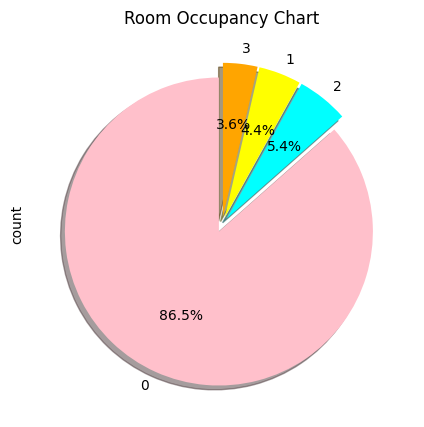

In [38]:
df5["Room_Occupancy_Count"].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(5,5),colors = ['pink', 'cyan','yellow','orange'])
plt.title("Room Occupancy Chart")
plt.show()

<Axes: xlabel='Room_Occupancy_Count', ylabel='count'>

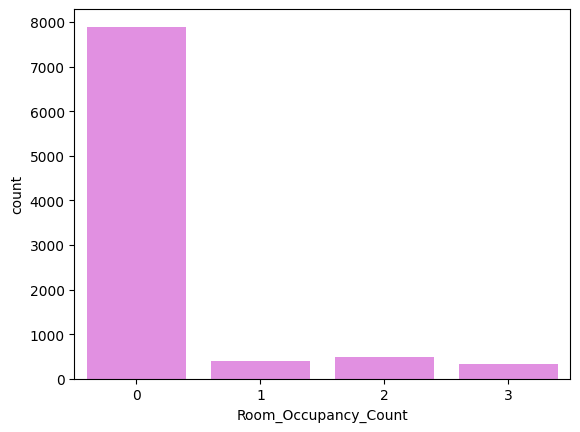

In [39]:
sns.countplot(x=df5.Room_Occupancy_Count,color='violet')

<Axes: xlabel='S6_PIR', ylabel='count'>

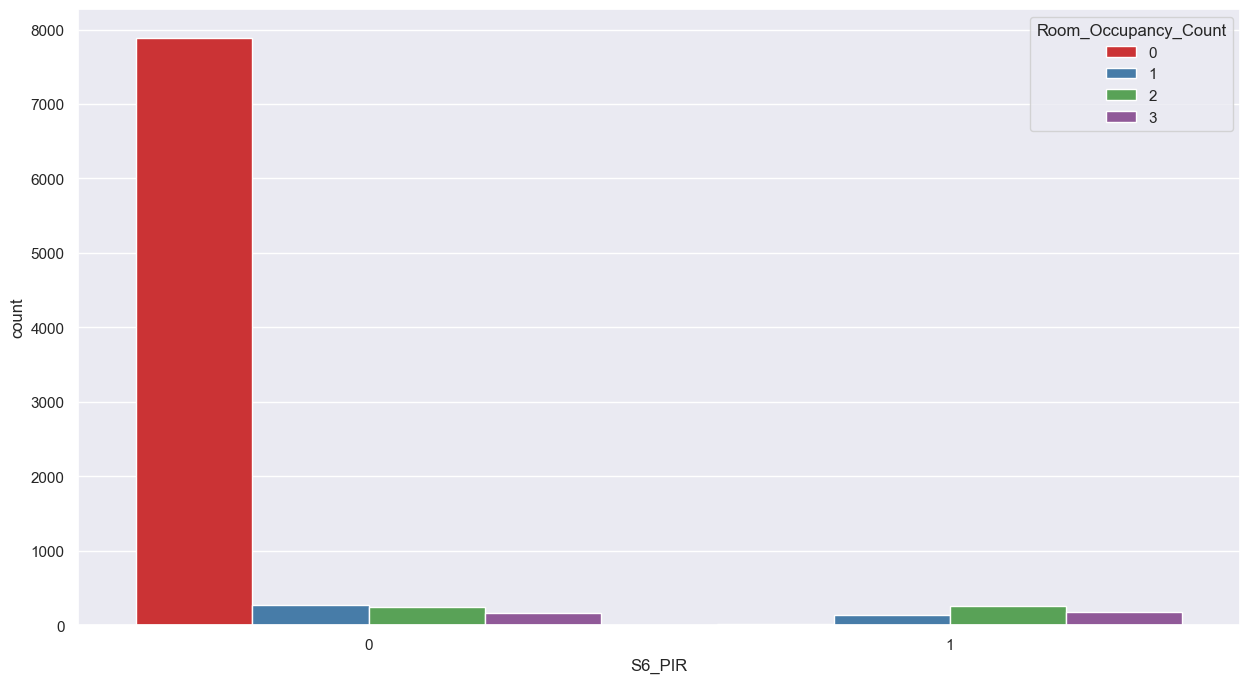

In [40]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x='S6_PIR',data=df5,hue='Room_Occupancy_Count',palette = "Set1")

<Axes: xlabel='S7_PIR', ylabel='count'>

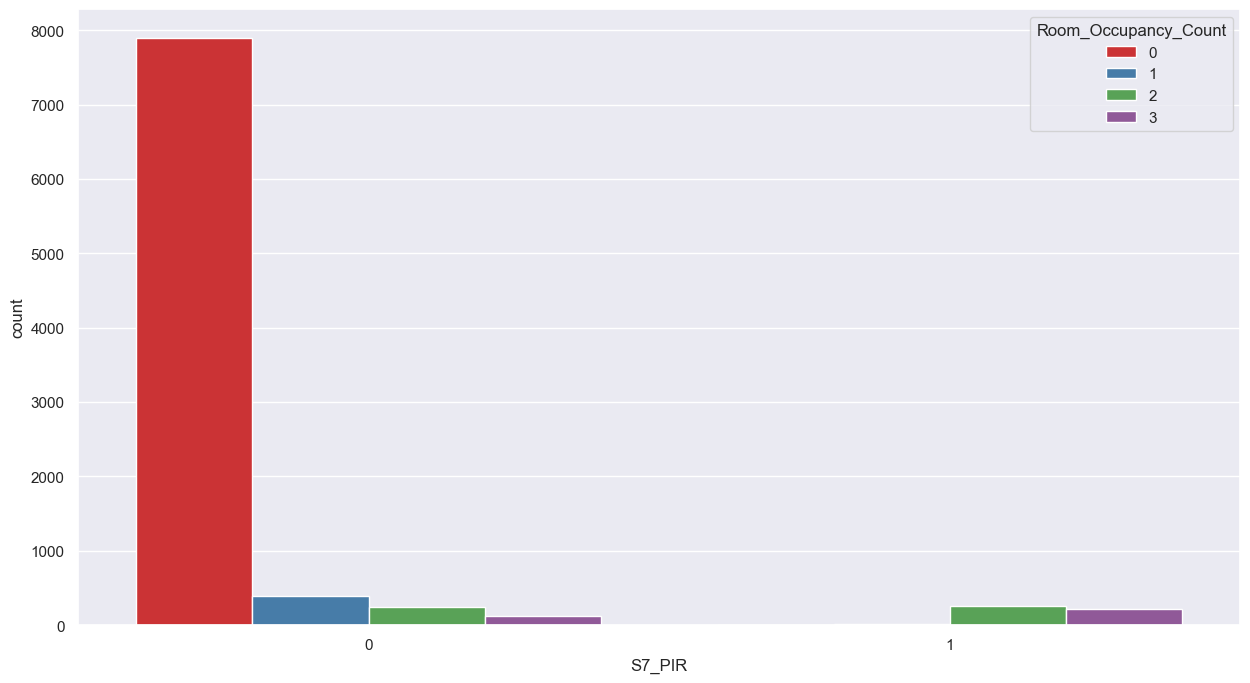

In [41]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x='S7_PIR',data=df5,hue='Room_Occupancy_Count',palette = "Set1")

In [42]:
df5.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
count,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000,9125.000000
mean,25.401293,25.439493,24.998219,25.712684,17.605151,16.039452,24.098630,11.823562,0.134739,0.097602,0.110685,0.092390,421.167671,-0.077426,0.062904,0.052822,0.261260,-0.187899
std,0.292677,0.395455,0.368676,0.321671,42.427249,51.095105,44.890254,18.547816,0.247124,0.219423,0.277186,0.073638,139.847565,0.967746,0.242804,0.223690,0.719945,0.684723
min,25.060000,24.810000,24.440000,25.130000,0.000000,0.000000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-5.542308,0.000000,0.000000,0.000000,-1.277854
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.000000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000,-0.619891
50%,25.310000,25.380000,24.940000,25.690000,0.000000,0.000000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000,-0.290909
75%,25.500000,25.500000,25.250000,25.940000,7.000000,8.000000,36.000000,21.000000,0.080000,0.050000,0.070000,0.100000,385.000000,0.000000,0.000000,0.000000,0.000000,-0.083131
max,26.310000,27.250000,26.060000,26.310000,165.000000,257.000000,280.000000,74.000000,3.840000,3.440000,3.660000,1.700000,1005.000000,5.138462,1.000000,1.000000,3.000000,2.946964


In [43]:
df5['Room_Occupancy_Count'].describe()


count    9125.000000
mean        0.261260
std         0.719945
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Room_Occupancy_Count, dtype: float64

<Figure size 1200x600 with 0 Axes>

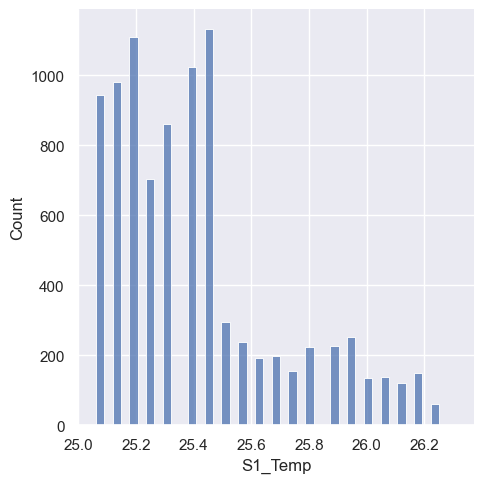

In [44]:

plt.figure(figsize=(12,6))
sns.displot(df5['S1_Temp'])
plt.show()

In [45]:
df5.sample(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,zscore
9120,2018/01/11,00:20:23,25.19,25.25,24.81,25.38,0,0,0,0,0.07,0.05,0.06,0.10,345,0.000000,0,0,0,-0.516002
7287,2017/12/26,02:18:29,25.31,25.38,24.94,25.69,0,0,0,0,0.08,0.06,0.06,0.11,355,0.000000,0,0,0,-0.290909
8381,2018/01/10,17:58:59,25.94,26.19,25.69,26.00,0,0,0,0,0.08,0.04,0.05,0.09,845,0.923077,0,0,0,1.111592
12,2017/12/22,10:55:49,25.06,24.88,24.63,25.50,123,35,57,43,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1,-1.156651
6252,2017/12/25,17:22:22,25.44,25.44,25.25,26.06,0,0,4,3,0.08,0.05,0.07,0.10,350,0.000000,0,0,0,-0.187020


### <span style="color:blue"> Encoding </span>

In [46]:
df5.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
zscore                  float64
dtype: object

In [47]:
le=LabelEncoder()
df5['Date']=le.fit_transform(df5['Date'])
df5['Time']=le.fit_transform(df5['Time'])
df.sample(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
3528,2017/12/23,17:51:16,26.19,26.13,25.81,26.31,150,236,185,11,0.19,0.42,0.19,0.14,805,1.407692,1,1,3
1978,2017/12/23,04:27:36,25.19,25.19,24.63,25.50,0,0,0,0,0.08,0.05,0.06,0.07,360,0.000000,0,0,0
7118,2017/12/26,00:51:10,25.38,25.38,24.94,25.81,0,0,0,0,0.08,0.05,0.07,0.10,355,0.000000,0,0,0
4132,2017/12/23,23:03:45,25.50,25.50,25.06,25.63,0,0,0,0,0.06,0.05,0.06,0.06,380,-0.234615,0,0,0
7409,2017/12/26,03:21:17,25.31,25.31,24.81,25.69,0,0,0,0,0.07,0.05,0.06,0.10,355,0.000000,0,0,0


In [48]:
df5.dtypes

Date                      int64
Time                      int64
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
zscore                  float64
dtype: object

In [49]:
# Splitting X and y
X=df5.drop(columns='Room_Occupancy_Count').values
y=df5['Room_Occupancy_Count'].values

In [50]:
X

array([[ 0.00000000e+00,  4.46800000e+03,  2.50600000e+01, ...,
         1.00000000e+00,  1.00000000e+00, -1.27785445e+00],
       [ 0.00000000e+00,  4.47100000e+03,  2.50600000e+01, ...,
         1.00000000e+00,  0.00000000e+00, -1.27785445e+00],
       [ 0.00000000e+00,  4.47400000e+03,  2.50600000e+01, ...,
         1.00000000e+00,  0.00000000e+00, -1.15665065e+00],
       ...,
       [ 6.00000000e+00,  4.05800000e+03,  2.51300000e+01, ...,
         0.00000000e+00,  0.00000000e+00, -8.44983739e-01],
       [ 6.00000000e+00,  4.06200000e+03,  2.51300000e+01, ...,
         0.00000000e+00,  0.00000000e+00, -8.44983739e-01],
       [ 6.00000000e+00,  4.06600000e+03,  2.51300000e+01, ...,
         0.00000000e+00,  0.00000000e+00, -8.44983739e-01]],
      shape=(9125, 19))

In [51]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(9125,))

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### <span style="color:blue"> Standardization </span>

In [75]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 0.66727844, -1.51427381, -0.0791261 , ..., -0.26112922,
        -0.23949541, -0.15617532],
       [ 0.14027069,  0.04018089, -0.72553853, ..., -0.26112922,
        -0.23949541, -0.63578381],
       [ 0.14027069,  0.24481413, -0.31727805, ..., -0.26112922,
        -0.23949541, -0.33287318],
       ...,
       [ 0.14027069,  0.85113484,  0.12500414, ..., -0.26112922,
        -0.23949541, -0.00472001],
       [-1.44075255,  1.64238335,  0.12500414, ..., -0.26112922,
        -0.23949541, -0.00472001],
       [ 1.19428619,  0.68515454,  1.62195923, ..., -0.26112922,
        -0.23949541,  1.5603182 ]], shape=(7300, 19))

### <span style="color:blue"> Model Creation & Evaluation</span>

#### <span style="color:purple"> Model-1 Logistic Regression </span>


In [54]:
lr_model=LogisticRegression()

In [55]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [56]:
# prediction
y_pred_lr=lr_model.predict(X_test)

In [57]:
# Accuracy Score
lr_score=accuracy_score(y_test,y_pred_lr)*100
lr_score

99.83561643835617

In [58]:

result=confusion_matrix(y_test,y_pred_lr)
result

array([[1596,    0,    0,    0],
       [   0,   89,    0,    0],
       [   0,    0,   81,    2],
       [   0,    0,    1,   56]])

In [59]:
report=classification_report(y_test,y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      1.00      1.00        89
           2       0.99      0.98      0.98        83
           3       0.97      0.98      0.97        57

    accuracy                           1.00      1825
   macro avg       0.99      0.99      0.99      1825
weighted avg       1.00      1.00      1.00      1825



In [60]:
y_test

array([0, 0, 0, ..., 0, 0, 0], shape=(1825,))

In [61]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], shape=(1825,))

#### <span style="color:purple"> Model-2 Random Forest </span>

In [62]:
rf_model=RandomForestClassifier()

In [63]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
# prediction
y_pred_rf=rf_model.predict(X_test)

In [65]:
# Accuracy Score
rf_score=accuracy_score(y_test,y_pred_rf)*100
rf_score

99.45205479452055

In [66]:
result=confusion_matrix(y_test,y_pred_rf)
result

array([[1596,    0,    0,    0],
       [   0,   89,    0,    0],
       [   0,    0,   74,    9],
       [   0,    0,    1,   56]])

In [67]:
report=classification_report(y_test,y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      1.00      1.00        89
           2       0.99      0.89      0.94        83
           3       0.86      0.98      0.92        57

    accuracy                           0.99      1825
   macro avg       0.96      0.97      0.96      1825
weighted avg       1.00      0.99      0.99      1825



#### <span style="color:purple"> Model-3 KNN </span>


In [68]:
knn_model=KNeighborsClassifier()

In [69]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
# prediction
y_pred_knn=knn_model.predict(X_test)

In [71]:
# Accuracy Score
knn_score=accuracy_score(y_test,y_pred_knn)*100
knn_score

99.45205479452055

In [72]:
# Confusion Matrix
result=confusion_matrix(y_test,y_pred_knn)
result

array([[1595,    0,    0,    1],
       [   0,   88,    1,    0],
       [   0,    0,   83,    0],
       [   0,    1,    7,   49]])

In [73]:
# Classification Report
report=classification_report(y_test,y_pred_knn)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       0.99      0.99      0.99        89
           2       0.91      1.00      0.95        83
           3       0.98      0.86      0.92        57

    accuracy                           0.99      1825
   macro avg       0.97      0.96      0.96      1825
weighted avg       0.99      0.99      0.99      1825



#### -------->From These Evaluations Logistic Regression Gives Best Result

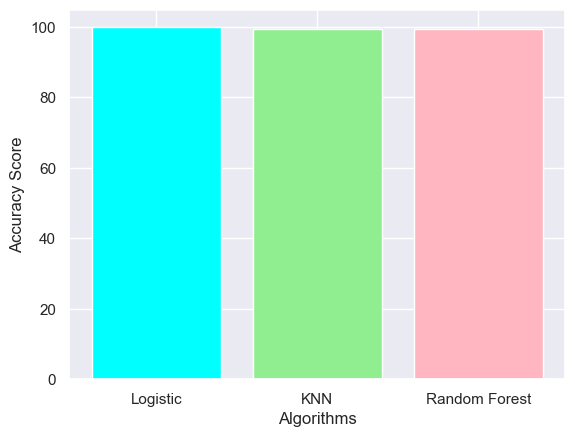

In [74]:
# Visualization
colors=['cyan','lightgreen','lightpink']
plt.bar(['Logistic','KNN','Random Forest'],[lr_score,knn_score,rf_score],color=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()